<a href="https://colab.research.google.com/github/dionatrafk/model_evaluation/blob/master/MLP_exec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi Layer Perceptron (MLP)

In [0]:
#Importar datasets
!git clone https://github.com/dionatrafk/model_evaluation

**Opções de execução: **default previsões  de 60 minutos.

**Copiar uma linha de hiperparâmetros e colar na linha 2 da próxima célula.**

'trace1.csv', 200, 130, 100, 10 \
'trace5.csv', 110, 180, 50, 25 \
'trace10.csv', 200, 130, 100, 10 \
'trace15.csv', 130, 200, 60, 30 \
'trace20.csv', 110, 190, 50, 16 \
'trace25.csv', 130, 200, 60, 30 \
'trace30.csv', 130, 200, 60, 30 \
'trace35.csv', 130, 200, 60, 30 \
'trace40.csv', 130, 200, 60, 30 \
'trace45.csv', 130, 200, 60, 30 \
'trace50.csv', 130, 200, 60, 30 \
'trace55.csv', 130, 200, 30, 60 \
'trace60.csv', 130, 130, 30, 30 \

In [3]:
#definir hiperparâmetros
filename, BATCH_SIZE, NB_EPOCHS, LAYER1, LAYER2 = 'trace60.csv', 130, 130, 30, 30
path = 'model_evaluation/http_requests_nasa/'
filename = path + filename

print filename

model_evaluation/http_requests_nasa/trace60.csv



Compilation Time :  0:00:00.028662
Training time :  0:00:01.467801
Trainscore: 514703.53 MSE (717.43 RMSE)
test time:  0:00:00.003986
timer:  0:00:01.608593
Filename: model_evaluation/http_requests_nasa/trace60.csv
BATCH_SIZE: 130
NB_EPOCHS:  130
LAYER1:  30
LAYER2:  30
R2:  0.8284504454063022
Testscore 546.44


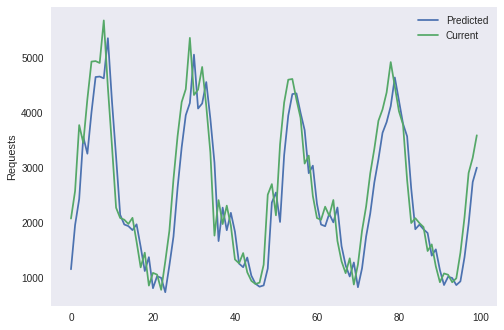

In [7]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import math
import os, sys

def create_dataset(dataset, lookback=1):
    dataX, dataY = [], [] # create 2 empty list

    # go through the lenght of dataset, subtract the lookback and 1. 
    #2 steps before the end of dataset, because we predict 1 step to the future
    for i in range(len(dataset)-lookback-1):
        a = dataset[i:(i+lookback),0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0]) # get the next value
    return np.array(dataX), np.array(dataY)

def save_model(model):
    filename = "data/" + "mlp" + ".h5"
    filename = "mlp" + ".h5"
    model.save(filename)


#perc = float(sys.argv[6])
np.random.seed(7)
# Data preparation
dataset = pd.read_csv(filename, usecols=[1], header=None)
dataset = dataset.values #convert to the array
dataset = dataset.astype('float32') # convert to float

# length of our data set
training_size = int(len(dataset)*0.67)
testing_size = len(dataset)-training_size

# split the data set
train, test = dataset[0:training_size,:], dataset[training_size:len(dataset),:]
#print(len(train),len(test))

# one time step to the future
lookback = 1
trainX, trainY = create_dataset(train, lookback)
testX, testY = create_dataset(test, lookback)

#size = int(training_size * (perc /100))
#trainX = trainX[0:training_size - size:]
#strainY = trainY[0:training_size - size:]

# create the model
model_name = 'requests_MLP'
model=Sequential()
model.add(Dense(LAYER1, input_dim=lookback, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(LAYER2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

#Compilation and training
timer = datetime.datetime.now() 
start = datetime.datetime.now()
model.compile(loss = 'mean_squared_error', optimizer = "adam") 

print ''
print "Compilation Time : ", datetime.datetime.now()  - start
start = datetime.datetime.now() 

model.fit(trainX,trainY,epochs=NB_EPOCHS, batch_size=BATCH_SIZE, verbose=0) 
print "Training time : ", datetime.datetime.now()  - start

yhat = model.predict(trainX)
y_train = trainY

train_score = mean_squared_error(y_train, yhat)
print ('Trainscore: %.2f MSE (%.2f RMSE)' %(train_score, math.sqrt(train_score)))
start = datetime.datetime.now() 


# Making predictions
yhat = model.predict(testX)
y_test = testY
r2 = r2_score(y_test,yhat)

print "test time: ",datetime.datetime.now()  - start
print "timer: ", datetime.datetime.now()  - timer

# configuration executed
print'Filename:',filename
print'BATCH_SIZE:',BATCH_SIZE
print'NB_EPOCHS: ',NB_EPOCHS 
print'LAYER1: ',LAYER1
print'LAYER2: ',LAYER2 

print'R2: ',r2
test_score = mean_squared_error(y_test, yhat)
print ('Testscore %.2f' %(math.sqrt(test_score)))
#print ('%.2f , %.2f ,' %(math.sqrt(score),perc)) + filename

#Save into a file the command of executions and its scores
#f=open("MLP_Execuções.txt", "a")
#f.write("\n python mlp.py %s %d %d %d %d - R2: %.2f, Trainscore: %.2f MSE (%.2f RMSE), Testscore: %.2f MSE (%.2f RMSE)" %(filename, BATCH_SIZE,NB_EPOCHS, LAYER1,LAYER2, r2, train_score, math.sqrt(train_score),test_score, math.sqrt(test_score))) 

#print 'actual,  predicted'
#for i in range(0, len(y_test)):
#  print('%.2f, %.2f' % (y_test[i],yhat[i+1]))

#plot executions
plt.plot(yhat[-100:], label='Predicted')
plt.plot(y_test[-100:], label='Current')
plt.legend()
plt.grid()

plt.ylabel('Requests')
plt.show()